#  Точные доверительные интервалы 

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Объявим функцию для построения доверительного интервала
def norm_conf_int(alpha, mean_hat, std_hat, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10, 5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return round(left, 2), round(right, 2)

__Описание переменных:__

```
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена
```


In [3]:
# Загрузим данные
df = pd.read_csv('flat.csv', sep='\t')
print(df.shape)
df.head()

(2040, 11)


,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [4]:
# Посмотрим на описательную статистику
df[['price', 'totsp', 'livesp', 'kitsp', 'dist', 'metrdist']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,2040.0,127.496569,51.878220,50.0,95.0,115.0,142.0,730.0
totsp,2040.0,73.084314,15.123450,44.0,62.0,73.5,79.0,192.0
livesp,2040.0,46.337255,7.894348,28.0,42.0,45.0,50.0,102.0
kitsp,2040.0,8.898529,2.787073,5.0,7.0,9.0,10.0,25.0
dist,2040.0,11.015686,3.375539,3.0,9.0,12.0,13.5,17.0
metrdist,2040.0,8.117157,3.815574,1.0,5.0,7.0,10.0,20.0


# 1. Доверительные интервалы для среднего

Построим $95\%$ асимптотический доверительный интервал для средней стоимости квартиры. Построим точный доверительный интервал для средней стоимости квартиры. Какой из них оказался уже? Почему? 

__Асимптотический доверительный интервал:__

$$
\bar x \pm z_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

> __Предположения:__ 
В выборке нет аномалий, собиралась независимо, тогда среднее асимптотически нормально распределено (ЦПТ) 

In [5]:
# Объявим генератор для нормального распределения
norm_rv = stats.norm()

# Зададим уровень значимости
alpha = 0.05

# Посчитаем нужный нам квантиль из нормального распределения
z_crit = norm_rv.ppf(1 - alpha/2)
print(f'Значение квантиля: {z_crit:.5}')

# Рассчитаем оценку для среднего
mu_hat = df.price.mean()
print(f'Оценка среднего: {mu_hat:.5}')

# Рассчитаем оценку для дисперсии
var_hat = df.price.var(ddof=1)
print(f'Оценка дисперсии: {var_hat:.6}')

# Число наблюдений в выборке
n = df.price.count()

# Нижняя граница доверительного интервала
left = mu_hat - z_crit * np.sqrt(var_hat/n)

# Верхняя граница доверительного интервала
right = mu_hat + z_crit * np.sqrt(var_hat/n)

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.4}".format(left, right, right - left))

Значение квантиля: 1.96
Оценка среднего: 127.5
Оценка дисперсии: 2691.35
Доверительный интервал [125.25; 129.75] ширины 4.502


In [6]:
# Доверительный интервал с помощью scipy
mu_hat = df.price.mean() 
sd_hat = df.price.std(ddof=1)/np.sqrt(n)

conf_int = stats.norm.interval(0.95, loc=mu_hat, scale=sd_hat)
print("Доверительный интервал [{:.5}; {:.5}] ширины {:.4}".format(conf_int[0], conf_int[1], conf_int[1] - conf_int[0]))

Доверительный интервал [125.25; 129.75] ширины 4.502


(125.25, 129.75)

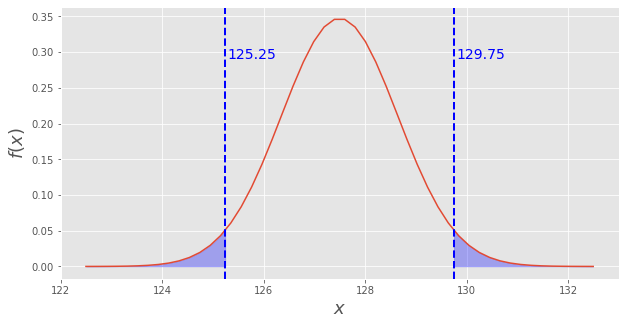

In [7]:
# Визуализируем асимптотический доверительный интервал
alpha = 0.05
mu_hat = df.price.mean() 
sd_hat = df.price.std(ddof=1)/np.sqrt(n)

norm_conf_int(alpha, mu_hat, sd_hat, margin=5)

__Точный доверительный интервал:__

$$
\bar x \pm t_{1 - \frac{\alpha}{2}} \cdot \sqrt{\frac{\hat s^2}{n}}.
$$

> __Предположения:__ 
Выборка пришла из нормального распределения, дисперсия неизвестна

In [8]:
# Рассчитаем размер выборки
n = df.price.count()

# Объявим генератор для распределения стьюдента с числом степеней свободы n - 1
t_rv = stats.t(n - 1)

# Зададим уровень значимости
alpha = 0.05

# Рассчитаем t-критерий
t_crit = t_rv.ppf(1 - alpha/2)
print(f'Значение квантиля: {t_crit:.5}')

# Рассчитаем оценку для среднего и дисперсии
mu_hat = df.price.mean() 
var_hat = df.price.var(ddof=1)

# Рассчитаем границы доверительного интервала
left = mu_hat - t_crit*np.sqrt(var_hat/n)
right = mu_hat + t_crit*np.sqrt(var_hat/n)

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.4}".format(left, right, right - left))

Значение квантиля: 1.9611
Доверительный интервал [125.24; 129.75] ширины 4.505


In [9]:
n

2040

In [10]:
# Оказался немного шире, но похож, так как:
# t(n) => N(0,1) при n -> inf 

In [11]:
# Доверительный интервал с помощью scipy
n = df.price.count()
mu_hat = df.price.mean()
sd_hat = df.price.std(ddof=1) / np.sqrt(n)

# тут 0.95 это 1 - alpha
left, right = stats.t.interval(0.95, df=(n-1), loc=mu_hat, scale=sd_hat)
print("Доверительный интервал [{:.5}; {:.5}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [125.24; 129.75] ширины 4.505


> Видим, что интервалы не сильно отличаются друг от друга, из-за того, что у нас в выборке много наблюдений. При большом числе степеней свободы распределение Стьюдента похоже на нормальное. Тем не менее даже при большом количестве наблюдений точный доверительный интервал оказывается немного шире. 

__Построим $99\%$ точные доверительные интервалы для всех районов. В какие из них попало общее среднее? Построим красивую визулизацию.__

In [12]:
df.head()

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [13]:
# Сгруппируем данные по районам и расчитаем среднее, стандартное отклонение и кол-во наблюдений
df_agg = df.groupby('code')['price'].agg(['mean', 'std', 'count'])
df_agg

,mean,std,count
code,,,
1,134.411765,49.619507,272
2,110.316279,29.518448,215
3,148.246377,70.573565,345
4,148.693780,73.656832,209
5,115.779762,31.507483,336
6,109.964981,32.976595,257
7,114.230088,33.897495,226
8,136.744444,48.639263,180


In [14]:
# Зададим уровень значимости
alpha = 0.01

# Рассчитаем t-критерий для выборки по каждому району
df_agg['t_crit'] = df_agg['count'].apply(lambda x: stats.t(x - 1).ppf(1 - alpha/2))

# Рассчитаем на сколько отступать вправо и влево от математического ожидания
df_agg['step'] =  df_agg['t_crit']  * df_agg['std']/np.sqrt(df_agg['count'])
df_agg

,mean,std,count,t_crit,step
code,,,,,
1,134.411765,49.619507,272,2.594092,7.804650
2,110.316279,29.518448,215,2.598998,5.232150
3,148.246377,70.573565,345,2.590197,9.841589
4,148.693780,73.656832,209,2.599672,13.245198
5,115.779762,31.507483,336,2.590585,4.452889
6,109.964981,32.976595,257,2.595170,5.338326
7,114.230088,33.897495,226,2.597856,5.857718
8,136.744444,48.639263,180,2.603574,9.438884


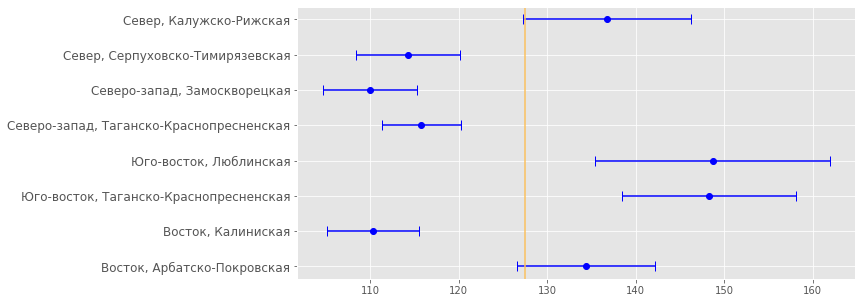

In [15]:
# Визуализируем доверительные интервалы для каждого района
district = [
    'Север, Калужско-Рижская', 'Север, Серпуховско-Тимирязевская', 
    'Северо-запад, Замоскворецкая', 'Северо-запад, Таганско-Краснопресненская', 
    'Юго-восток, Люблинская', 'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калиниская', 'Восток, Арбатско-Покровская'
]

center = df_agg['mean'].values
step = df_agg['step'].values

# общее среднее
mu_hat = df.price.mean()

ax = plt.figure(figsize=(10, 5))

ax = plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=5, fmt='o', color='blue')

ax = plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12)
ax = plt.axvline(mu_hat, color='C4');

__Выводы:__ 

- В среднем, самая дорогая недвижимость находится на Юго-востоке. Самая дешёвая на Северо-западе. 

# 2. Доверительный интервал для разности средних

### Построим $95\%$ асимптотический доверительный интервал для разницы в средней стоимости квартир в монолитных и панельных домах.

$$
\bar x - \bar y \pm z_{crit} \cdot \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}}
$$

In [16]:
# Сделаем срез по данным
x = df[df.brick == 1].price.values
y = df[df.brick == 0].price.values

# Посчитаем разность между средними по двум выборкам
diff = x.mean() - y.mean() 

# Посчитаем число наблюдений в выборках
nx, ny = x.size, y.size

# Рассчитаем стандартное отклонение
diff_sd = np.sqrt(x.var(ddof=1) / nx + y.var(ddof=1)/ny)

# Рассчитаем доверительный интервал
left, right = stats.norm.interval(0.95, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [23.49; 34.36] ширины 10.87


### Предположим, что дисперсии неизвестны, но равны.

$$
\bar x - \bar y \pm t_{crit} \cdot \sqrt{\frac{s^2}{n_x} + \frac{s^2}{n_y}}
$$

In [17]:
# Посчитаем разность между средними по двум выборкам
diff = x.mean() - y.mean()

# Рассчитаем дисперсию
s2 = ((nx - 1) * x.var() + (ny - 1) * y.var()) / (nx + ny - 2)
diff_sd = np.sqrt(s2/nx + s2/ny)

# Рассчитаем доверительный интервал
left, right = stats.t.interval(0.95, df=(nx + ny - 2), loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Доверительный интервал [24.28; 33.58] ширины 9.297


В данном случае предпосылка о равенстве дисперсий не корректна, т.к. дисперсии двух выборок существенно различаются. Из-за того что в данной предпосылке используется общая дисперсия по двум выборкам, доверительный интервал получается уже чем асимптотически нормальный.

In [18]:
x.var(), y.var()

(4264.981392232218, 1668.1298841576563)

### Предположим, что дисперсии неизвестны и не равны. Построим приближённый доверительный интервал (интервал Уэлча).

In [19]:
# Посчитаем разность между средними по двум выборкам
diff = x.mean() - y.mean()

# Рассчитаем стандартное отклонение
diff_sd = np.sqrt(x.var() / nx + y.var()/ny)

# Рассчитаем число степеней свободы
u = (x.var() / nx + y.var() / ny) ** 2
d = (x.var()**2) / (nx**2 * (nx - 1)) + (y.var()**2)/ (ny**2* (ny - 1))
nu =  u/d 
print("Число степеней свободы:", nu)

# Рассчитаем доверительный интервал
left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))

Число степеней свободы: 911.4012642833161
Доверительный интервал [23.49; 34.37] ширины 10.88


**Приближение Уэлча уместно использовать в тех ситуациях, когда в выборке с большей дисперсией имеется больше наблюдений.**

In [20]:
# Посмотрим на размеры выборки
nx, ny

(659, 1381)

In [21]:
# Посмотрим на стандартное отколонение в выборках
x.std(), y.std()

(65.30682500498871, 40.842745796012004)

Поскольку в выборке `nx` стандартное отклонение больше чем в выборке `ny`, приближение Уэлча показывает себя не совсем корректно, есть основания не доверять построенному доверительному интервалу.

> **Все три доверительных интервала из-за больших объёмов выборки снова оказались похожи. Выборочные дисперсии довольно сильно отличаются друг от друга, из-за этого использование доверительного интервала с предпосылкой о их равенстве некорректно.**

__Выводы:__ 

- В среднем, на уровне значимости $5\%$, квартиры в монолитных домах стоят дороже, чем в панельных. Ноль нигде не попадает в доверительный интервал.  

# 3. Доверительный интервал для дисперсии

Предполагая нормальность распределения цен, построим $95\%$ доверительный интервал для дисперсии стоимости квартир. 

$$
\frac{(n - 1) \cdot s^2}{\chi_{n-1}^2 \left(\frac{\alpha}{2} \right)} \le \sigma^2 \le \frac{(n - 1) \cdot s^2}{\chi_{n-1}^2 \left(1 - \frac{\alpha}{2} \right)}
$$


> __Предположения:__ 
Выборка пришла из нормального распределения, математическое ожидание неизвестно, выполняется теорема Фишера


In [22]:
# Зададим уровень значимости
alpha = 0.05 

# Количество переменных
n = df.price.count()

# Оценка дисперсии
var_hat = df.price.var(ddof=1)

# Верхний и нижний квантили для распределения хи-квадрат
chi_l, chi_u = stats.chi2.ppf([1-alpha/2, alpha/2], df = n - 1)

# Рассчитаем интервал
left = (n - 1) * var_hat/chi_l
right = (n - 1) * var_hat/chi_u

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, right - left))

Доверительный интервал [2533.5; 2864.5] ширины 331.01


Сделаем то же самое, но в разбивке по районам. 

In [23]:
# Агрегируем данные
df_agg = df.groupby('code')['price'].agg(['var', 'count'])

alpha = 0.05
df_agg['ch_l'] = df_agg['count'].apply(lambda w: stats.chi2.ppf(1-alpha/2, df = w - 1))
df_agg['ch_u'] = df_agg['count'].apply(lambda w: stats.chi2.ppf(alpha/2, df = w - 1))

df_agg['left'] =  (df_agg['count'] - 1) * df_agg['var']/df_agg['ch_l']
df_agg['right'] =  (df_agg['count'] - 1) * df_agg['var']/df_agg['ch_u']

df_agg

,var,count,ch_l,ch_u,left,right
code,,,,,,
1,2462.095507,272,318.493509,227.293087,2094.949704,2935.539707
2,871.338752,215,256.407893,175.378164,727.226026,1063.225252
3,4980.628075,345,397.276692,294.510332,4312.702181,5817.575378
4,5425.328855,209,249.834911,169.951073,4516.856343,6639.960458
5,992.721500,336,387.599359,286.187623,858.003747,1162.040827
6,1087.455800,257,302.211810,213.574668,921.170767,1303.472401
7,1149.040157,226,268.437839,185.348344,963.105785,1394.854843
8,2365.777902,180,217.940765,143.844791,1943.070379,2943.966485


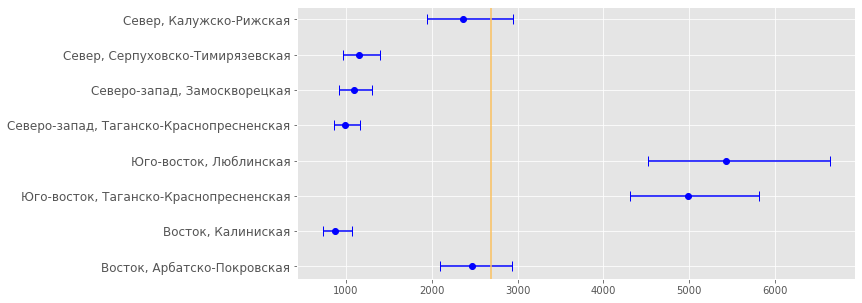

In [24]:
# Визуализируем доверительные интервалы для каждого района
district = [
    'Север, Калужско-Рижская', 'Север, Серпуховско-Тимирязевская', 
    'Северо-запад, Замоскворецкая', 'Северо-запад, Таганско-Краснопресненская', 
    'Юго-восток, Люблинская', 'Юго-восток, Таганско-Краснопресненская',
    'Восток, Калиниская', 'Восток, Арбатско-Покровская'
]

center = df_agg['var'].values
step = np.array([df_agg['var'].values - df_agg['left'].values, 
                 df_agg['right'].values - df_agg['var'].values])

var_hat = df.price.var()

plt.figure(figsize=(10,5))

plt.errorbar(center, np.arange(center.size),  xerr = step, 
             capsize=5, fmt="o", color='blue')

plt.yticks(np.arange(center.size - 1, -1, -1), district, fontsize=12);
plt.axvline(var_hat, 0, color='C4');

__Выводы:__ 

- На Юго-Востоке самый большой разброс в ценах. Как покупатель, я найду здесь более разнообразные предложения. Так происходит из-за того, что с одной стороны районы близки к центру и здесь есть респектабельная недвижимость. С другой стороны, в районах довольно много советской застройки с плохой планировкой и ремонтом. 

# 4. Доверительный интервал для отношения дисперсий

Предполагая нормальность распределения, построим $95\%$-ый доверительный интервал для отношения дисперсии стоимости квартир в монолитных домах и в панельных домах. 


$$
\frac{s^2_m}{s^2_n} \cdot F_{\frac{\alpha}{2}}(n,m) \le \frac{\sigma^2_m}{\sigma^2_n} \le  \frac{s^2_m}{s^2_n} \cdot F_{1 - \frac{\alpha}{2}}(n,m)
$$

In [25]:
alpha = 0.05

x = df[df.brick == 1].price.values
y = df[df.brick == 0].price.values

n, m = x.size - 1, y.size - 1
sn, sm = x.var(), y.var()

left = sm / sn * stats.f(n, m).ppf(alpha/2)
right = sm / sn * stats.f(n, m).ppf(1 - alpha/2)

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, right - left))

Доверительный интервал [0.34243; 0.44536] ширины 0.10293


In [26]:
x.std(), y.std()

(65.30682500498871, 40.842745796012004)

__Выводы:__ 

- Единица не попала в доверительный интервал. Дисперсии в ценах на монолитное жильё и на панельное различаются. Цены на монолитное жильё обладают более высокой дисперсией. 

## А можно ли было пользоваться нормальным распределением? 

Распределение цен выглядит не очень нормальным. 

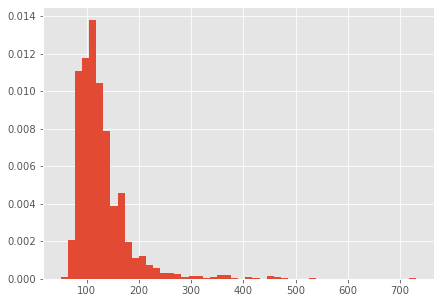

In [27]:
plt.figure(figsize=(7, 5))
df.price.hist(bins=50,density=True);

Распределение логарифмов цен оказывается более похожим на нормальное.

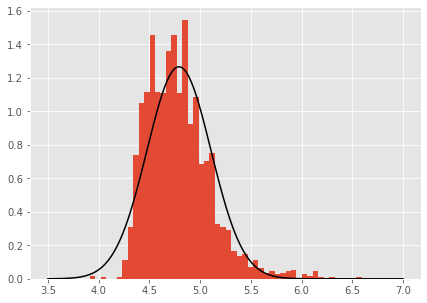

In [28]:
plt.figure(figsize=(7, 5))
df.price.apply(np.log).hist(bins=50, density=True);

x = df.price.apply(np.log).values

xs = np.linspace(3.5, 7, 300)
ys = stats.norm(loc=np.mean(x), scale=np.std(x, ddof=1)).pdf(xs)
plt.plot(xs, ys, color="black");

Можно формально проверить гипотезу о том, имеет ли какая-то выборка нормальное распределение с помошью теста Колмогорова-Смирнова.

In [29]:
stats.kstest(df.price, 'norm', args=(df.price.mean(), df.price.std(ddof=1)))

KstestResult(statistic=0.1508501598050489, pvalue=5.415515510735646e-41)

In [30]:
stats.kstest(x, 'norm', args=(np.mean(x), np.std(x, ddof=1)))

KstestResult(statistic=0.07697286130504083, pvalue=5.856877429594e-11)

В обоих ситуациях `pvalue` очень низкое, это говорит о том, что выборка не распределена нормально. Поскольку наблюдений у нас много, существенных выбросов в данных нет - в рассмотренных случаях корректно работает ЦПТ.